# Import Lib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data

In [2]:
df = pd.read_csv('data.csv')

# Modele

## 1) Features selected

In [4]:
numerical_features = ['distance']
categorical_features = ['weekday', 'hour']
pca_loc = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']

In [7]:
features = numerical_features + categorical_features + pca_loc

y = df['trip_duration']
X = df[features]

## 2) split

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

## 3) Preprocessor

In [9]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_validate
from sklearn.decomposition import PCA

#preprocessing

numerical_pipeline = make_pipeline(SimpleImputer(), RobustScaler())
categorical_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), 
                                     OneHotEncoder(handle_unknown = "ignore"))
loc_pipeline = make_pipeline(RobustScaler(),
                               PCA(n_components=3))

preprocessor = make_column_transformer((numerical_pipeline, numerical_features), 
                                       (categorical_pipeline, categorical_features),
                                       (loc_pipeline, pca_loc))

# 4) Estimator

In [12]:
from sklearn.ensemble import GradientBoostingRegressor

estimator = GradientBoostingRegressor(n_estimators=200,
                                     learning_rate=0.15)

# 5) fit

In [13]:
model = make_pipeline(preprocessor, estimator)
model.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('robustscaler',
                                                                   RobustScaler())]),
                                                  ['distance']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                            

## 6) result

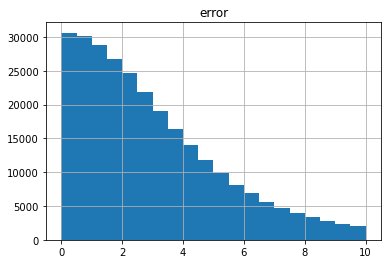

       trip_duration
count  291141.000000
mean        3.721504
std         4.331250
min         0.000046
25%         1.203859
50%         2.602902
75%         4.746503
max       152.887055


In [33]:
y_pred = model.predict(X_test)
#plot error hist
err = np.abs(y_test-y_pred)/60
s_err = pd.DataFrame(err)
s_err.hist(bins=20, range=[0, 10])
plt.title("error")
plt.show()
print(s_err.describe())


r2 = 76.85%


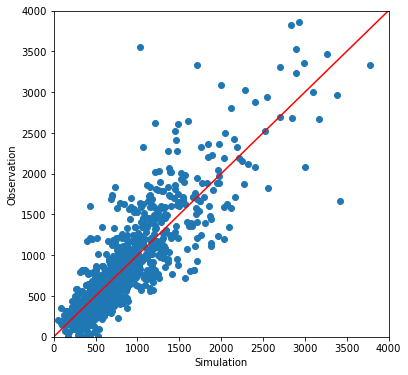

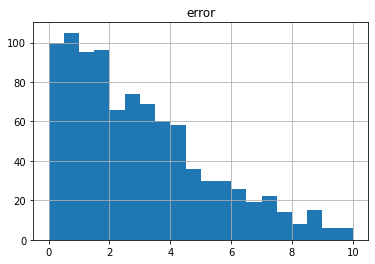

       trip_duration
count    1000.000000
mean        3.812582
std         4.076315
min         0.001251
25%         1.225976
50%         2.722663
75%         4.893726
max        41.933058


In [31]:
from sklearn.metrics import r2_score

def plot_sim_vs_obs(model, X_test, y_test):

    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    print('r2 = {:.2%}'.format(r2))
    
    sim = list(y_pred)
    obs = list(y_test)

    plt.figure(figsize=(6,6))
    lim_max= 4000
    lim_min = 0
    plt.scatter(sim, obs)
    plt.xlim(lim_min,lim_max)
    plt.xlabel('Simulation')
    plt.ylim(lim_min,lim_max)
    plt.ylabel('Observation')
    
    a = [lim_min, lim_max]
    b = [lim_min, lim_max]
    plt.plot(a, b, 'r-')
    plt.show()
    
    
    #plot error hist
    err = np.abs(y_test-y_pred)/60
    s_err = pd.DataFrame(err)
    q_75 = int(s_err.quantile(q=0.75))
    s_err.hist(bins=20, range=[0, 10])
    plt.title("error")
    plt.show()
    print(s_err.describe())

    
df_sample = df.sample(n=1000)
X_sample = df_sample[features]
y_sample = df_sample['trip_duration']

plot_sim_vs_obs(model, X_sample, y_sample)

## 7) export model

In [37]:
import joblib

joblib.dump(model, 'model_nyc_taxi.joblib')

['model_nyc_taxi.joblib']